# Feature Scaling and Engineering
# Checking the Python Environment

This is to ensure that the correct Python environment is set up correctly and used

In [1]:
import sys
import IPython

# Change path to append here
sys.path.append(r'C:\Users\hp\Downloads\Machine Learning Assignment')

print("Python executable:", sys.executable)
print("Python version:", sys.version)
print("Kernel:", IPython.get_ipython().kernel)
print("Sys paths:", sys.path)

Python executable: C:\Users\hp\Downloads\Machine Learning Assignment\ml-venv\Scripts\python.exe
Python version: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
Kernel: <ipykernel.ipkernel.IPythonKernel object at 0x00000205CAB4F750>
Sys paths: ['C:\\Users\\hp\\Downloads\\Machine Learning Assignment', 'C:\\Users\\hp\\anaconda3\\python311.zip', 'C:\\Users\\hp\\anaconda3\\DLLs', 'C:\\Users\\hp\\anaconda3\\Lib', 'C:\\Users\\hp\\anaconda3', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment\\ml-venv', '', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment\\ml-venv\\Lib\\site-packages', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment\\ml-venv\\Lib\\site-packages\\win32', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment\\ml-venv\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment\\ml-venv\\Lib\\site-packages\\Pythonwin', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment']


# Importing Libraries

This is to ensure that the necessary libraries are imported and used

In [2]:
# For DataFrame
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# For dimensionality reduction
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap

# For serialisation and de-serialisation
import pickle

# Loading the Dataset

Following shows the raw dataset that is loaded into the notebook

In [3]:
df = pd.read_csv(r'../raw_data/customer_sampled_srs_preprocessed_knn_n3.csv', index_col = 'CUST_ID')

# DROPPING DERIVED COLUMNS
df = df.drop(['PURCHASES', 'PURCHASES_FREQUENCY'], axis = 1)

# 1.0 Feature Scaling
Here two methods are experimented:
1. Standard Scaling
2. Min-max Scaling

## 1.1 Standard Scaling

In [4]:
standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(df)

df_standard_scaled = pd.DataFrame(standard_scaled_data, index = df.index, columns = 'STANDARD_' + df.columns)

# 1.2 Min-Max Scaling

In [5]:
minmax_scaler = MinMaxScaler(feature_range = (0, 1))
minmax_scaled_data = minmax_scaler.fit_transform(df)

df_minmax_scaled = pd.DataFrame(minmax_scaled_data, index = df.index, columns = 'MINMAX_' + df.columns)

# 2.0 Feature Engineering
Here three dimensionality reduction methods are experimented:
1. Principal Component Analysis (PCA)
2. t-Stochastic Neighbouring Embedding (t-SNE)
3. Uniform Manifold Approximation and Projection (UMAP)

## 2.1 Principal Component Analysis (PCA)

In [6]:
pca = PCA(random_state = 42)
pca_features_data = pca.fit_transform(df_standard_scaled)

df_scaled_pca = pd.DataFrame(pca_features_data, index = df_standard_scaled.index, columns = [f'PC{i+1}' for i in range(pca_features_data.shape[1])])

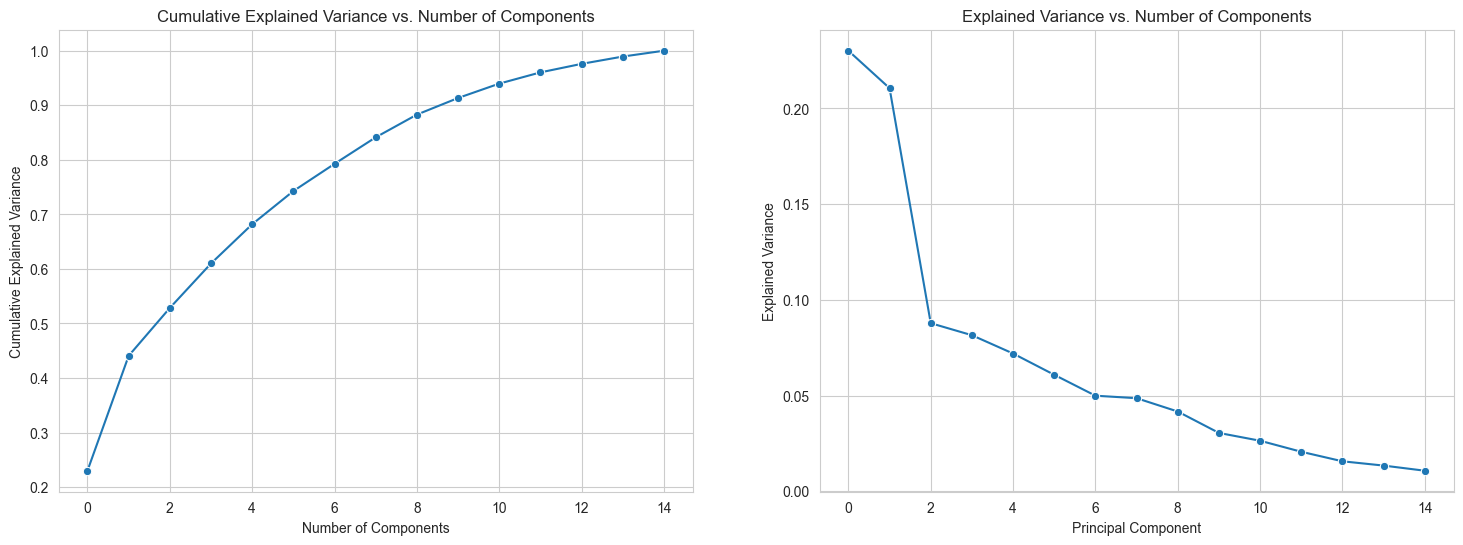

In [7]:
df_explained_variance = pd.DataFrame({
    'Component': [i for i in range(pca_features_data.shape[1])],
    'Explained Variance': pca.explained_variance_ratio_,
    'Cumulative Explained Variance': np.cumsum(pca.explained_variance_ratio_)
})


# Creating subplots
fig, axes = plt.subplots(1, 2, figsize = (18, 6))

# Plotting subplot for Cumulative Explained Variance
sns.lineplot(x = 'Component', y = 'Cumulative Explained Variance', data = df_explained_variance, marker = 'o', ax = axes[0])
axes[0].set_title('Cumulative Explained Variance vs. Number of Components')
axes[0].set_xlabel('Number of Components')
axes[0].set_ylabel('Cumulative Explained Variance')

# Plotting subplot for Explained Variance
sns.lineplot(x = 'Component', y = 'Explained Variance', data = df_explained_variance, marker = 'o', ax = axes[1])
axes[1].set_title('Explained Variance vs. Number of Components')
axes[1].set_xlabel('Principal Component')
axes[1].set_ylabel('Explained Variance')

plt.show()

It can be seen that most variance are explain by the first 5 components. Therefore, we will use the first 5 components for the model for experimental purposes

## 2.2 t-Stochastic Neighbouring Embedding (t-SNE)

Text(0.5, 0, 'TSNE 3')

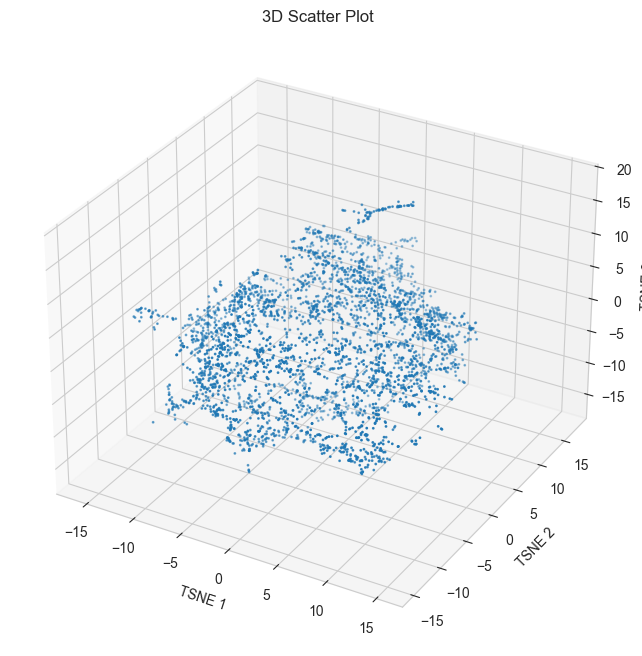

In [8]:
# Perform t-SNE with 3 components
# Random state is set to 42 for reproducibility
tsne = TSNE(n_components = 3, random_state = 42)
tsne_results = tsne.fit_transform(df_standard_scaled)

# Create a DataFrame with t-SNE results
df_scaled_tsne = pd.DataFrame(tsne_results, index = df_standard_scaled.index, columns = ['TSNE1', 'TSNE2', 'TSNE3'])

# Plotting scatter plot using Seaborn
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(xs = df_scaled_tsne['TSNE1'], ys = df_scaled_tsne['TSNE2'], zs = df_scaled_tsne['TSNE3'], s = 1)

# Set labels
ax.set_title('3D Scatter Plot')
ax.set_xlabel('TSNE 1')
ax.set_ylabel('TSNE 2')
ax.set_zlabel('TSNE 3')

## 2.3 Uniform Manifold Approximation and Projection (UMAP)

C:\Users\hp\Downloads\Machine Learning Assignment\ml-venv\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Text(0.5, 0, 'UMAP 3')

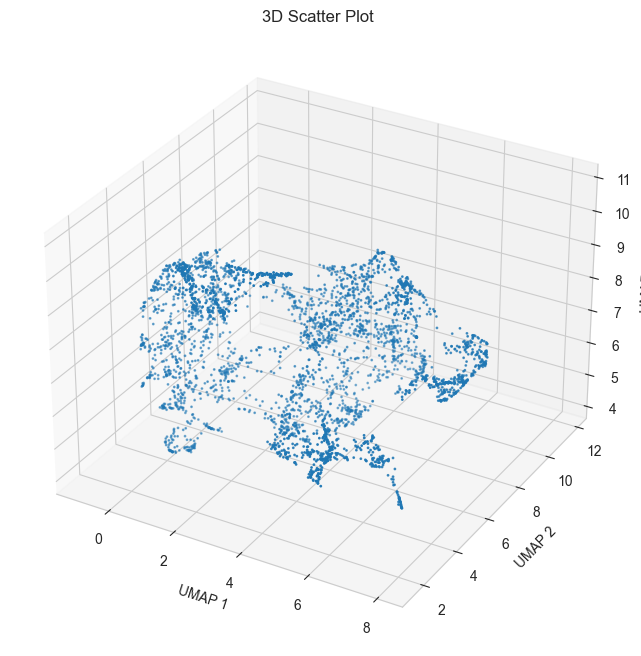

In [9]:
# Perform UMAP with 3 components
umap_model = umap.UMAP(random_state = 42, n_components = 3)
umap_results = umap_model.fit_transform(df_standard_scaled)

# Create a DataFrame with UMAP results
df_scaled_umap = pd.DataFrame(umap_results, index = df_standard_scaled.index, columns = ['UMAP1', 'UMAP2', 'UMAP3'])

# Plotting scatter plot using Seaborn
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(xs = df_scaled_umap['UMAP1'], ys = df_scaled_umap['UMAP2'], zs = df_scaled_umap['UMAP3'], s = 1)

# Set labels
ax.set_title('3D Scatter Plot')
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_zlabel('UMAP 3')

# Saving the Dataset

In [10]:
with open(r'../raw_data/standard_scaler.pkl', 'wb') as file:
    pickle.dump(standard_scaler, file)

with open(r'../raw_data/minmax_scaler.pkl', 'wb') as file:
    pickle.dump(minmax_scaler, file)

df_standard_scaled.to_csv(r'../raw_data/customer_standard_scaled.csv')
df_minmax_scaled.to_csv(r'../raw_data/customer_minmax_scaled.csv')

df_scaled_pca.iloc[:, :5].to_csv(r'../raw_data/customer_pca_5.csv')
df_scaled_tsne.to_csv(r'../raw_data/customer_tsne_3.csv')
df_scaled_umap.to_csv(r'../raw_data/customer_umap_3.csv')